# Install Packges

In [24]:
!pip install langchain-anthropic
!pip install sentence-transformers
!pip install langchain
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 5

In [ ]:
!git clone https://github.com/Ethan-Chiu/Gen-AI-Tut.git

/content/Gen-AI-Tut
Already up to date.
api  api_test.ipynb  docs  rag.ipynb  router_chain.ipynb  router_chain_test.ipynb


# Set Environment Variables

In [1]:
import os
os.environ['OPENAI_API_KEY'] = "..."
os.environ["ANTHROPIC_API_KEY"]="..."
# from dotenv import load_dotenv
# load_dotenv()

# Load and Split Documents

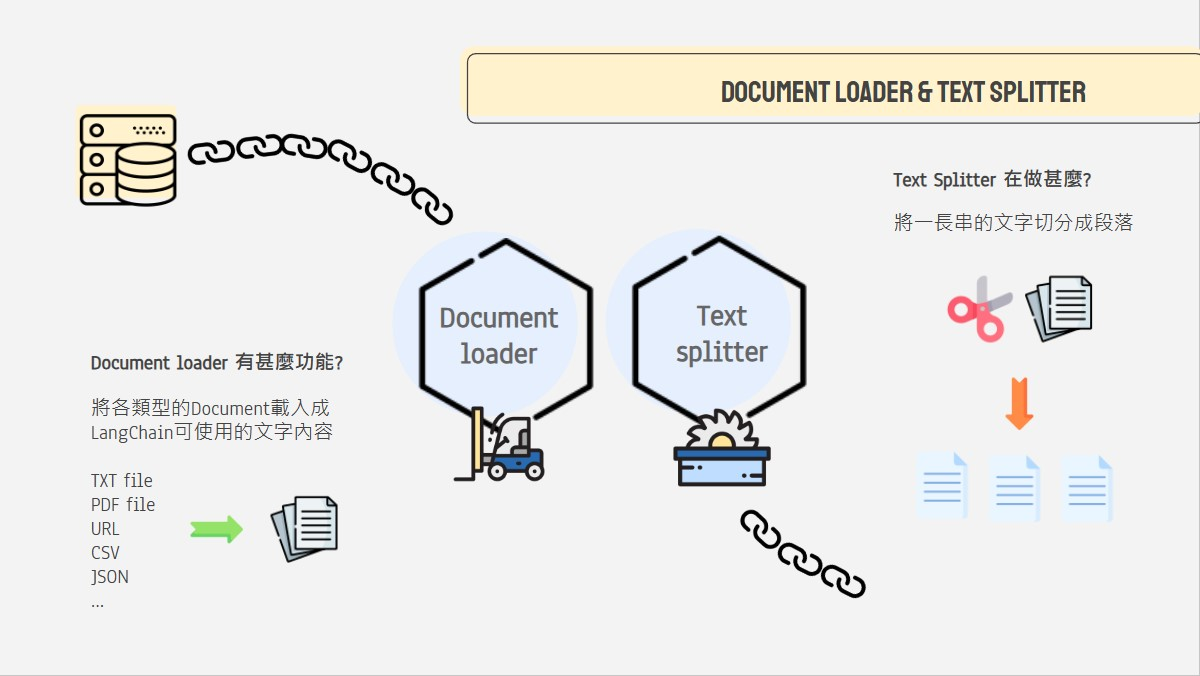

## load documents

In [20]:
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://docs.smith.langchain.com/user_guide")
web_docs = loader.load()

In [21]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("/content/Gen-AI-Tut/docs/rag/example.txt")
txt_docs = loader.load()

## Split Documents

In [22]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=0)
web_splits = text_splitter.split_documents(web_docs)
txt_splits = text_splitter.split_documents(txt_docs)

# Embedding and Vector Store


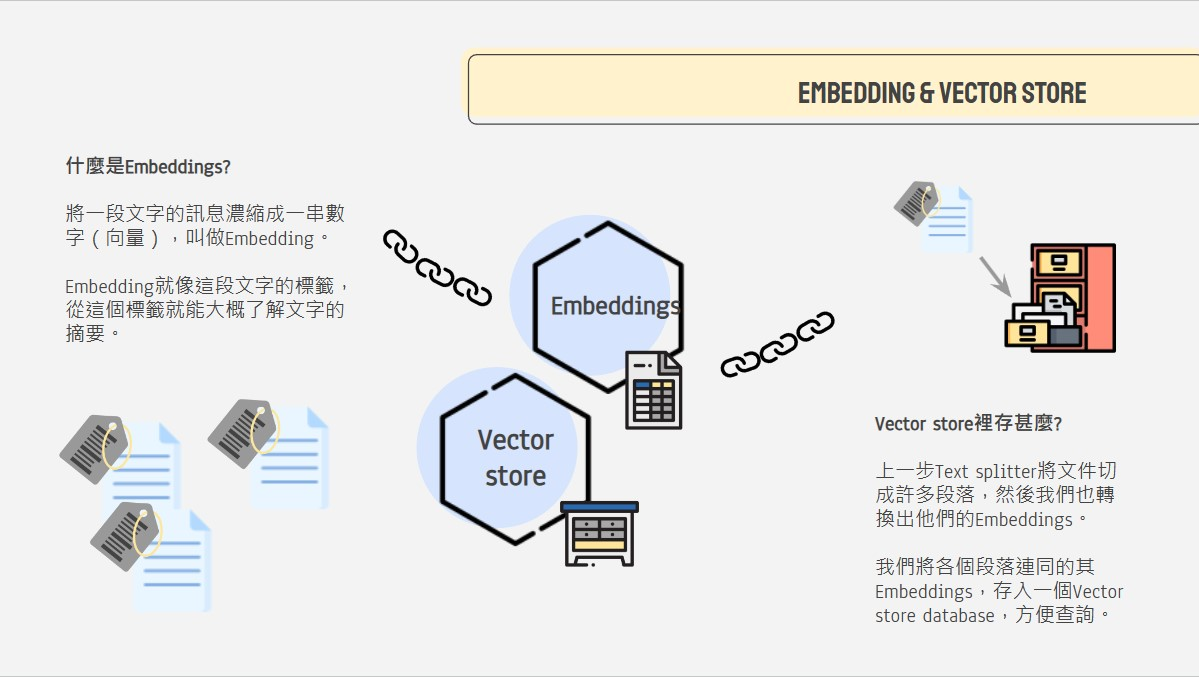

### Chroma

In [25]:
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)

# create the open-source embedding function
embedding_function = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

# load it into Chroma
vector = Chroma.from_documents(web_splits, embedding_function)
vector = Chroma.from_documents(txt_splits, embedding_function)

# Retriever and Prompt

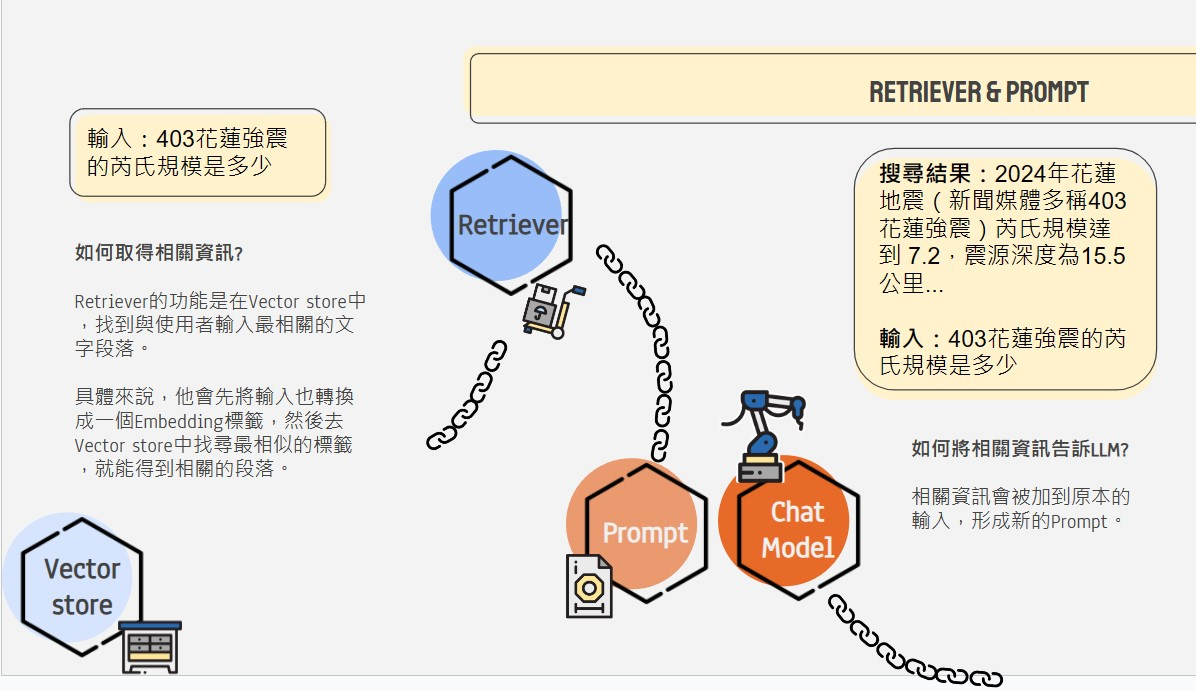

## Retriever

In [ ]:
retriever = vector.as_retriever()

## Prompt

In [26]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain

prompt = ChatPromptTemplate.from_template("""Answer the following question based only on the provided context:

<context>
{context}
</context>

Question: {input}""")

# Create RAG chain


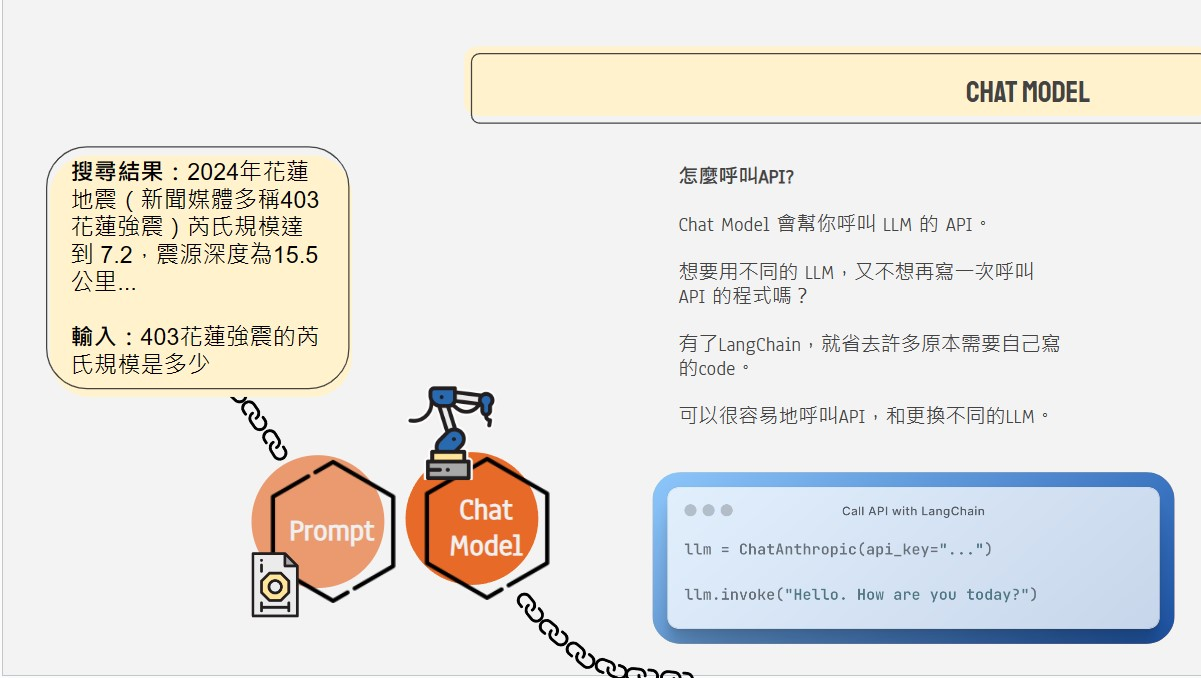

In [27]:
from langchain_anthropic import ChatAnthropic
from langchain.chains import create_retrieval_chain

llm = ChatAnthropic(temperature=0,  model_name="claude-3-haiku-20240307")
document_chain = create_stuff_documents_chain(llm, prompt)
retrieval_chain = create_retrieval_chain(retriever, document_chain)

# Sample Usage

In [30]:
response = retrieval_chain.invoke({"input": "how can langsmith help with testing?"})
print(response["answer"])


Based on the provided context, LangSmith can help with testing in the following ways:

1. Bulk upload of test cases: LangSmith allows you to upload test cases in bulk, making it easier to manage and run a large number of test cases.

2. Custom evaluations: LangSmith makes it easy to run custom evaluations, both LLM-based and heuristic-based, to score test results.

3. Comparison view: LangSmith provides a user-friendly comparison view for test runs, allowing you to track and diagnose regressions in test scores across multiple revisions of your application.

4. Tracing and debugging: LangSmith suggests having tracing enabled by default, which helps with debugging when developing new LLM applications. You can filter traces based on feedback tags and scores to identify and investigate problematic points.

5. Annotation queues: LangSmith supports sending runs to annotation queues, where annotators can closely inspect interesting traces and annotate them based on different criteria. This he

In [33]:
response = retrieval_chain.invoke({"input": "Is Max a student?"})
print(response["answer"])

Yes, based on the provided context, Max is a student.
